In [1]:
from powerspectra import Powerspectra
from modecoupling import Modecoupling
import matplotlib.pyplot as plt
import matplotlib
from cosmology import Cosmology
import numpy as np
from noise import Noise

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rc('figure', facecolor='w')

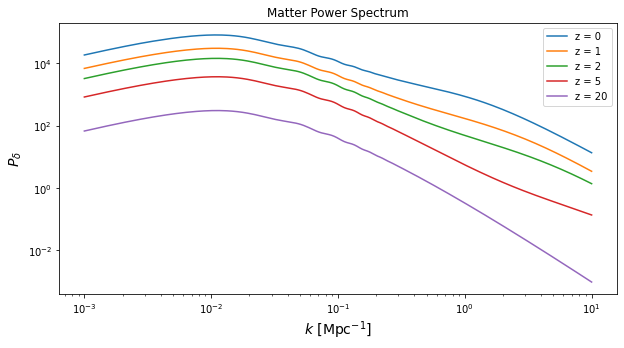

In [3]:
# Matter Powe Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$P_{\delta}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter Power Spectrum")
plt.legend()
plt.show()

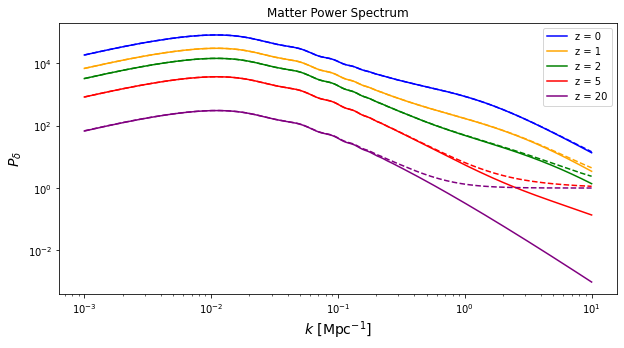

In [4]:
plt.figure()
colours = ["blue", "orange", "green", "red", "purple"]
for iii, z in enumerate(zs):
    ps = power.get_matter_ps("matter", z, ks)
    ps1 = power.get_matter_ps("matter", z, ks) + 1
    plt.loglog(ks, ps, label=f"z = {z}", color=colours[iii])
    plt.loglog(ks, ps1, linestyle="--", color=colours[iii])
    plt.ylabel("$P_{\delta}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter Power Spectrum")
plt.legend()
plt.show()

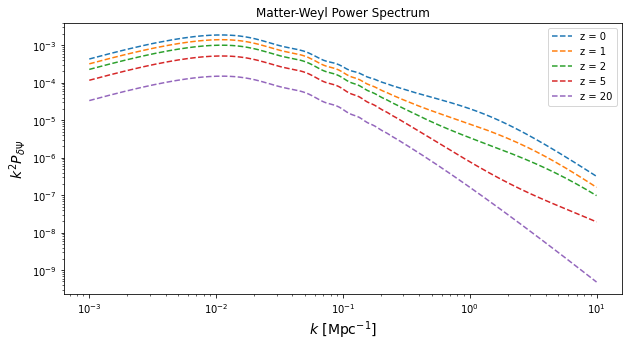

In [5]:
# Matter-Weyl Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("matter-weyl", z, ks)
    plt.loglog(ks, np.abs(ps), linestyle="--", label=f"z = {z}")
    plt.ylabel("$k^2P_{\delta\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Matter-Weyl Power Spectrum")
plt.legend()
plt.show()

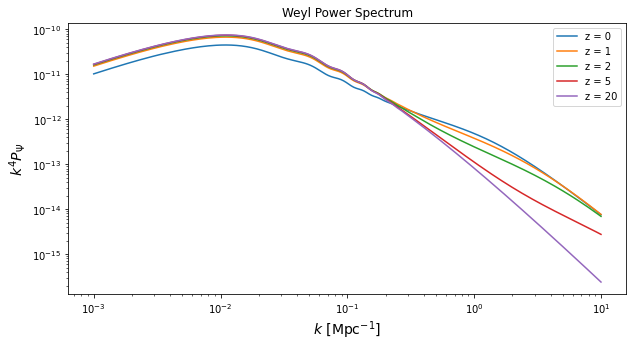

In [6]:
# Weyl Potential Power Spectrum
power = Powerspectra()
ks = np.logspace(-3, 1, 200)
zs = np.array([0, 1, 2, 5, 20])

plt.figure()
for z in zs:
    ps = power.get_matter_ps("weyl", z, ks)
    plt.loglog(ks, ps, label=f"z = {z}")
    plt.ylabel("$k^4P_{\Psi}$", fontsize=14)
    plt.xlabel("$k$ [Mpc$^{-1}$]", fontsize=14)
    plt.title("Weyl Power Spectrum")
plt.legend()
plt.show()

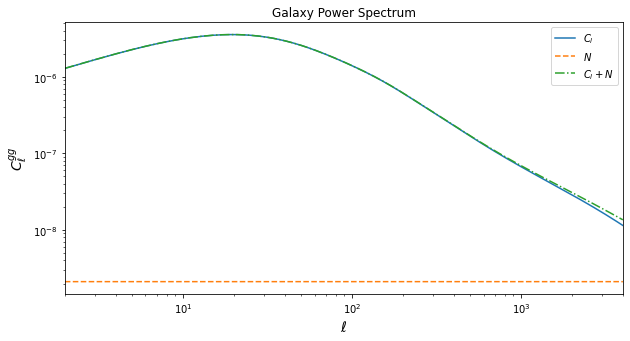

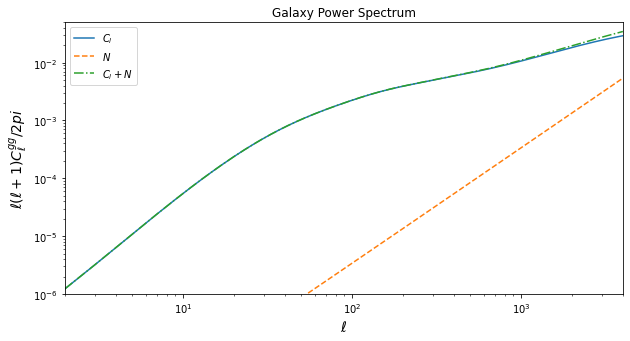

In [7]:
from noise import Noise
cosmo = Cosmology()
_noise = Noise()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)
plt.figure()
plt.loglog(ells, Cl_gg, label="$C_l$")
plt.loglog(ells,N_gg[ells], label="$N$", linestyle="--")
plt.loglog(ells,Cl_gg+N_gg[ells], label="$C_l + N$", linestyle="dashdot")
plt.ylabel("$C_{\ell}^{gg}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(2,4000)
plt.legend()

plt.figure()
plt.loglog(ells, (ells*(ells + 1))/(2*np.pi)*Cl_gg, label="$C_l$")
plt.loglog(ells,(ells*(ells + 1))/(2*np.pi)*N_gg[ells], label="$N$", linestyle="--")
plt.loglog(ells,(ells*(ells + 1))/(2*np.pi)*(Cl_gg+N_gg[ells]), label="$C_l + N$", linestyle="dashdot")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.legend()
plt.xlim(2,4000)
plt.ylim(1e-6, 5e-2)
plt.show()

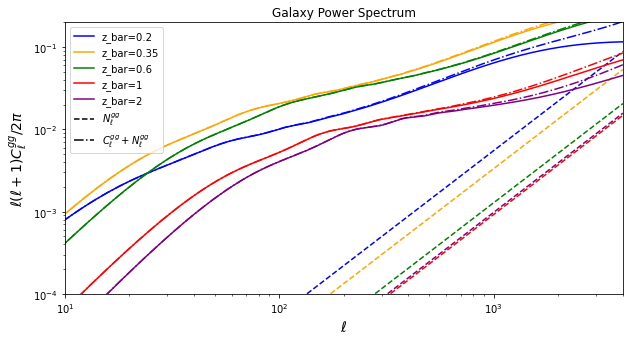

In [8]:
# Comapre to 1906.08760 fig 3.
bins_min = [0.06, 0.25, 0.41, 0.75, 1.19]
bins_max = [0.33, 0.46, 0.78, 1.3, 2.85]
bins = [0.2, 0.35, 0.6, 1, 2]
colours = ["blue", "orange", "green", "red", "purple"]
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, Nchi=1000, gal_win_zmin_a=bins_min[iii], gal_win_zmax_a=bins_max[iii], gal_win_zmin_b=bins_min[iii], gal_win_zmax_b=bins_max[iii])
    N_gg = _noise.get_gal_shot_N(ellmax=ellmax, zmin=bins_min[iii], zmax = bins_max[iii])
    plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi), label=f"z_bar={binn}", color=colours[iii])
    plt.loglog(ells, N_gg[ells]*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="--")
    plt.loglog(ells, (N_gg[ells]+Cl_gg)*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="dashdot")
plt.plot([-1e9], [-1e9], linestyle="--", label="$N^{gg}_{\ell}$", color="k")
plt.plot([-1e9], [-1e9], linestyle="dashdot", label="$C_{\ell}^{gg}+N^{gg}_{\ell}$", color="k")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)
plt.ylim(1e-4, 2e-1)
plt.legend()
plt.show()

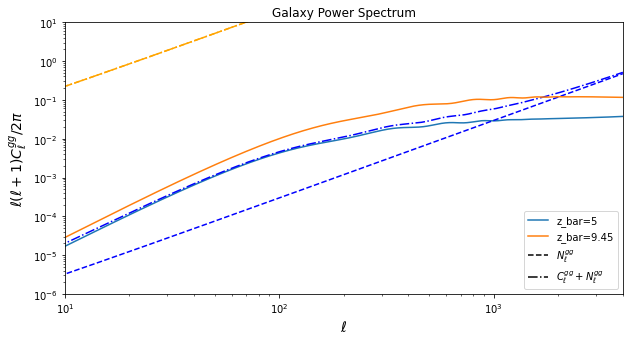

In [9]:
# Comapre to 1906.08760 fig 4.
#bins_min = [0.75, 1.19, 2.85, 7.04]
#bins_max = [1.3, 2.85, 7.04, 11.85]
#bins = [1, 2, 5, 9.45]
bins_min = [ 2.85, 7.04]
bins_max = [ 7.04, 11.85]
bins = [5, 9.45]
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, gal_win_zmin_a=bins_min[iii], gal_win_zmax_a=bins_max[iii], gal_win_zmin_b=bins_min[iii], gal_win_zmax_b=bins_max[iii])
    N_gg = _noise.get_gal_shot_N(ellmax=ellmax, zmin=bins_min[iii], zmax = bins_max[iii])
    plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi), label=f"z_bar={binn}")
    plt.loglog(ells, N_gg[ells]*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="--")
    plt.loglog(ells, (N_gg[ells]+Cl_gg)*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="dashdot")
plt.plot([-1e9], [-1e9], linestyle="--", label="$N^{gg}_{\ell}$", color="k")
plt.plot([-1e9], [-1e9], linestyle="dashdot", label="$C_{\ell}^{gg}+N^{gg}_{\ell}$", color="k")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)
plt.ylim(1e-6, 1e1)
plt.legend()

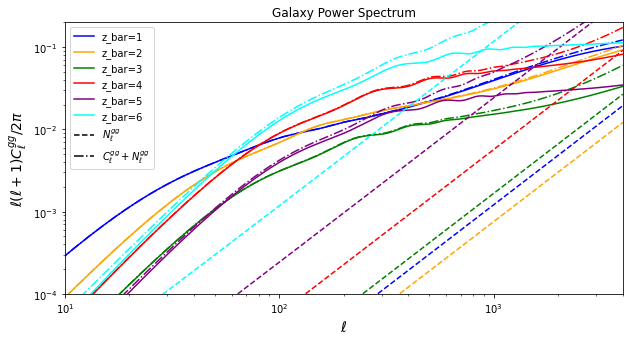

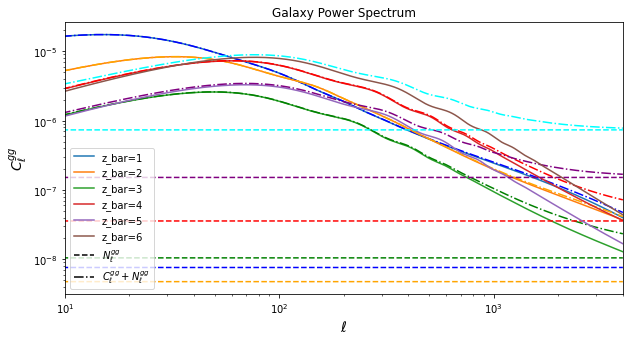

In [10]:
zmax = 4
Nbins = 6
bin_width = zmax/Nbins
bins_min = [iii*bin_width for iii in range(Nbins)]
bins_max = [iii*bin_width for iii in range(1, Nbins+1)]
bins = [iii for iii in range(1, Nbins+1)]
colours = ["blue", "orange", "green", "red", "purple", "cyan"]
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, Nchi=1000, gal_win_zmin_a=bins_min[iii], gal_win_zmax_a=bins_max[iii], gal_win_zmin_b=bins_min[iii], gal_win_zmax_b=bins_max[iii])
    N_gg = _noise.get_gal_shot_N(ellmax=ellmax, zmin=bins_min[iii], zmax = bins_max[iii])
    plt.loglog(ells, Cl_gg*(ells*(ells + 1))/(2*np.pi), label=f"z_bar={binn}", color=colours[iii])
    plt.loglog(ells, N_gg[ells]*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="--")
    plt.loglog(ells, (N_gg[ells]+Cl_gg)*(ells*(ells + 1))/(2*np.pi), color=colours[iii], linestyle="dashdot")
plt.plot([-1e9], [-1e9], linestyle="--", label="$N^{gg}_{\ell}$", color="k")
plt.plot([-1e9], [-1e9], linestyle="dashdot", label="$C_{\ell}^{gg}+N^{gg}_{\ell}$", color="k")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{gg}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)
plt.ylim(1e-4, 2e-1)
plt.legend()

plt.figure()
for iii, binn in enumerate(bins):
    Cl_gg = power.get_gal_ps(ells, gal_win_zmin_a=bins_min[iii], gal_win_zmax_a=bins_max[iii], gal_win_zmin_b=bins_min[iii], gal_win_zmax_b=bins_max[iii])
    N_gg = _noise.get_gal_shot_N(ellmax=ellmax, zmin=bins_min[iii], zmax = bins_max[iii])
    plt.loglog(ells, Cl_gg, label=f"z_bar={binn}")
    plt.loglog(ells, N_gg[ells], color=colours[iii], linestyle="--")
    plt.loglog(ells, (N_gg[ells]+Cl_gg), color=colours[iii], linestyle="dashdot")
plt.plot([-1e9], [-1e9], linestyle="--", label="$N^{gg}_{\ell}$", color="k")
plt.plot([-1e9], [-1e9], linestyle="dashdot", label="$C_{\ell}^{gg}+N^{gg}_{\ell}$", color="k")
plt.ylabel("$C_{\ell}^{gg}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Galaxy Power Spectrum")
plt.xlim(1e1, 4e3)
plt.legend()
plt.show()

In [11]:
ells = np.arange(2, 4000 + 1, 1)
Cl_II = power.get_cib_ps(ells, nu=353e9)
print("353")
print(Cl_II[2000])
print(Cl_II[2000]*2000*2001/(2*np.pi))
print("-------------------")
Cl_II = power.get_cib_ps(ells, nu=545e9)
print("545")
print(Cl_II[2000])
print(Cl_II[2000]*2000*2001/(2*np.pi))
print("-------------------")
Cl_II = power.get_cib_ps(ells, nu=857e9)
print("857")
print(Cl_II[2000])
print(Cl_II[2000]*2000*2001/(2*np.pi))
print("-------------------")

353
1.1662421478752358e-10
7.428240371111648e-05
-------------------
545
2.0973429414545044e-09
0.001335877590958503
-------------------
857
8.40883129996518e-09
0.005355904882195256
-------------------


/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)


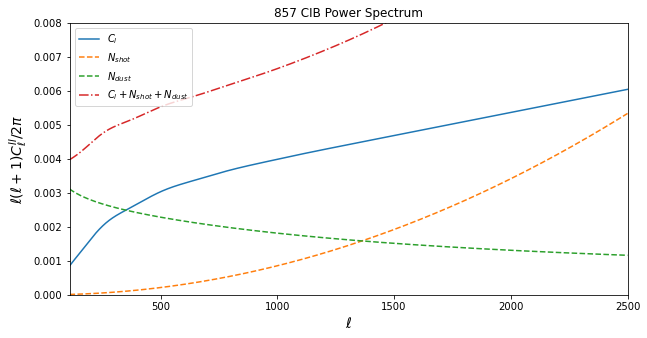

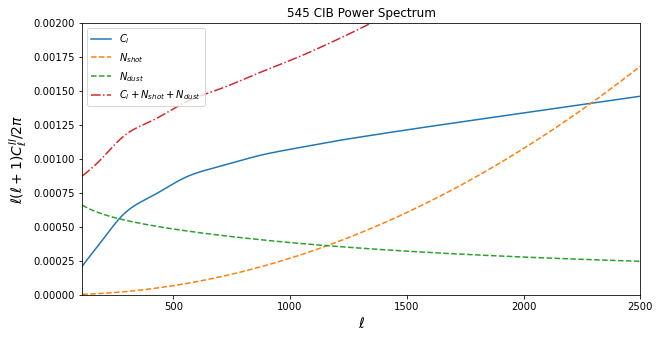

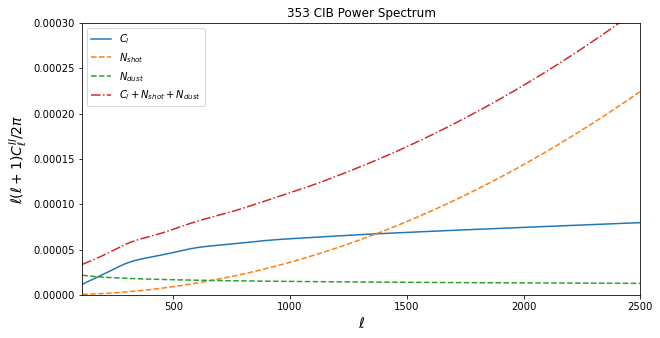

In [12]:
from noise import Noise
_noise = Noise()
ellmax = 2500
ells = np.arange(110, ellmax + 1, 1)
Cl_II = power.get_cib_ps(ells, nu=857e9)
N_II = _noise.get_cib_shot_N(nu=857e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=857e9, ellmax=ellmax)
plt.figure()
plt.plot(ells, ells*(ells+1)/(2*np.pi)*Cl_II, label="$C_l$")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_II[ells], label="$N_{shot}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_dust[ells], label="$N_{dust}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*(Cl_II + N_II[ells] + N_dust[ells]), label="$C_l + N_{shot} + N_{dust}$",linestyle="dashdot")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{II}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("857 CIB Power Spectrum")
plt.xlim(110, 2500)
plt.ylim(0, 0.008)
plt.legend()

Cl_II = power.get_cib_ps(ells, nu=545e9)
N_II = _noise.get_cib_shot_N(nu=545e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=545e9, ellmax=ellmax)
plt.figure()
plt.plot(ells, ells*(ells+1)/(2*np.pi)*Cl_II, label="$C_l$")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_II[ells], label="$N_{shot}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_dust[ells], label="$N_{dust}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*(Cl_II + N_II[ells] + N_dust[ells]), label="$C_l + N_{shot} + N_{dust}$",linestyle="dashdot")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{II}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("545 CIB Power Spectrum")
plt.xlim(110, 2500)
plt.ylim(0, 0.002)
plt.legend()

Cl_II = power.get_cib_ps(ells, nu=353e9)
N_II = _noise.get_cib_shot_N(nu=353e9, ellmax=ellmax)
N_dust = _noise.get_dust_N(nu=353e9, ellmax=ellmax)
plt.figure()
plt.plot(ells, ells*(ells+1)/(2*np.pi)*Cl_II, label="$C_l$")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_II[ells], label="$N_{shot}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*N_dust[ells], label="$N_{dust}$", linestyle="--")
plt.plot(ells, ells*(ells+1)/(2*np.pi)*(Cl_II + N_II[ells] + N_dust[ells]), label="$C_l + N_{shot} + N_{dust}$",linestyle="dashdot")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{II}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("353 CIB Power Spectrum")
plt.xlim(110, 2500)
plt.ylim(0, 0.0003)
plt.legend()
plt.show()

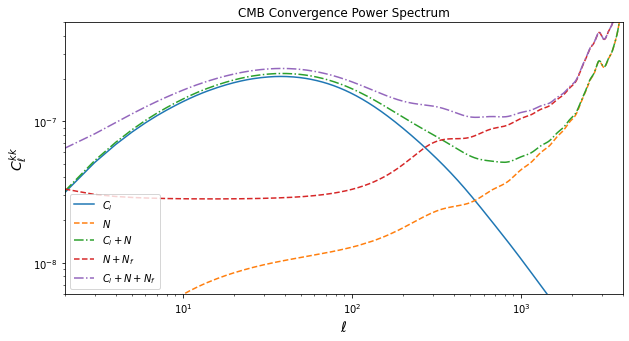

<Figure size 720x360 with 0 Axes>

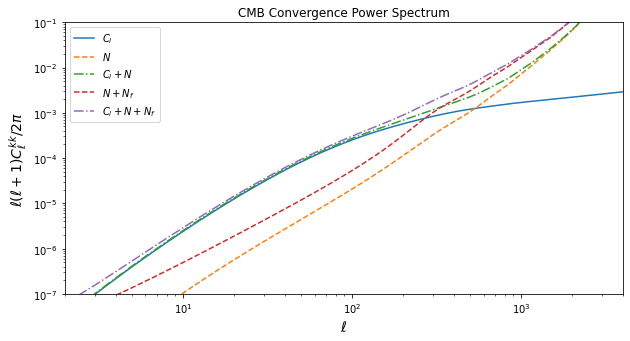

In [13]:
from noise import Noise
_noise = Noise()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Cl_kk = power.get_kappa_ps(ells)
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=0)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=True)
plt.figure()
plt.loglog(ells, Cl_kk, label="$C_l$")
plt.loglog(ells,N_kk[ells], label="$N$", linestyle="--")
plt.loglog(ells,Cl_kk + N_kk[ells], label="$C_l + N$",linestyle="dashdot")

N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
plt.loglog(ells,N_kk[ells], label="$N+N_f$", linestyle="--")
plt.loglog(ells,Cl_kk + N_kk[ells], label="$C_l + N + N_f$",linestyle="dashdot")
plt.ylabel("$C_{\ell}^{kk}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.ylim(6e-9, 5e-7)
plt.xlim(2, 4e3)
plt.title("CMB Convergence Power Spectrum")
plt.legend()

plt.figure()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=0)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=True)
plt.figure()
plt.loglog(ells, ells*(ells+1)/(2*np.pi)*Cl_kk, label="$C_l$")
plt.loglog(ells,ells*(ells+1)/(2*np.pi)*N_kk[ells], label="$N$", linestyle="--")
plt.loglog(ells,ells*(ells+1)/(2*np.pi)*(Cl_kk + N_kk[ells]), label="$C_l + N$",linestyle="dashdot")

N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)
plt.loglog(ells,ells*(ells+1)/(2*np.pi)*N_kk[ells], label="$N+N_f$", linestyle="--")
plt.loglog(ells,ells*(ells+1)/(2*np.pi)*(Cl_kk + N_kk[ells]), label="$C_l + N + N_f$",linestyle="dashdot")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{kk}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("CMB Convergence Power Spectrum")
plt.legend()
plt.ylim(1e-7, 1e-1)
plt.xlim(2, 4e3)
plt.show()

In [14]:
omega_Ls, omega_ps = cosmo.get_postborn_omega_ps(ellmax=8000)

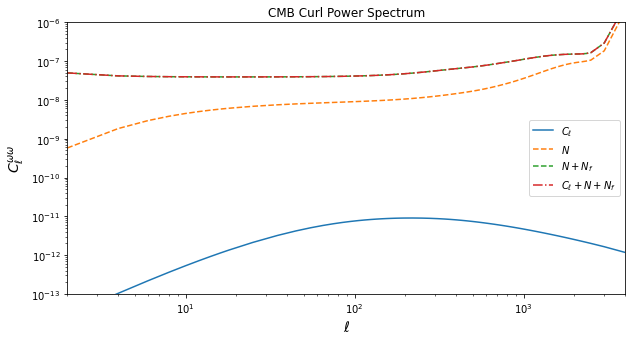

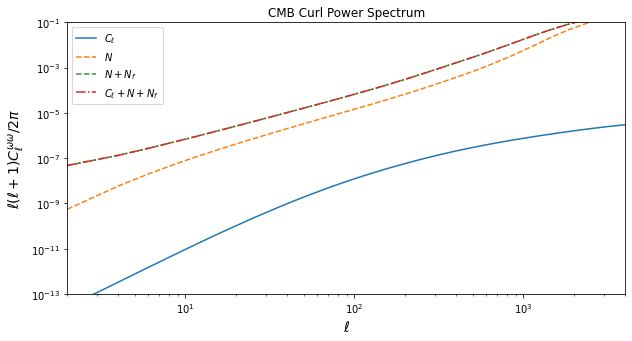

In [15]:
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=0)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=True)
plt.loglog(omega_Ls, omega_ps, label="$C_{\ell}$")
plt.loglog(omega_Ls,N_ww[omega_Ls], label="$N$", linestyle="--")
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
plt.loglog(omega_Ls, N_ww[omega_Ls], label="$N + N_f$",linestyle="--")
plt.loglog(omega_Ls, omega_ps + N_ww[omega_Ls], label="$C_{\ell} + N + N_f$",linestyle="dashdot")

plt.legend()
plt.title("CMB Curl Power Spectrum")
plt.ylabel("$C_{\ell}^{\omega\omega}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.ylim(1e-13, 1e-6)
plt.xlim(2, 4e3)

plt.figure()
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=0)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=True)
plt.loglog(omega_Ls, omega_Ls*(omega_Ls+1)/(2*np.pi)*omega_ps, label="$C_{\ell}$")
plt.loglog(omega_Ls,omega_Ls*(omega_Ls+1)/(2*np.pi)*N_ww[omega_Ls], label="$N$", linestyle="--")
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
plt.loglog(omega_Ls, omega_Ls*(omega_Ls+1)/(2*np.pi)*(N_ww[omega_Ls]), label="$N + N_f$",linestyle="--")
plt.loglog(omega_Ls, omega_Ls*(omega_Ls+1)/(2*np.pi)*(omega_ps + N_ww[omega_Ls]), label="$C_{\ell} + N + N_f$",linestyle="dashdot")

plt.legend()
plt.title("CMB Curl Power Spectrum")
plt.ylabel("$\ell(\ell+1)C_{\ell}^{\omega\omega}/2\pi$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.ylim(1e-13, 1e-1)
plt.xlim(2, 4e3)
plt.show()

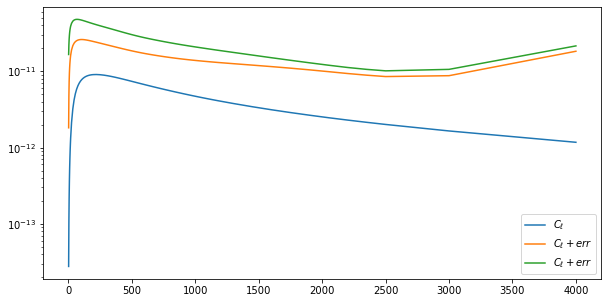

In [16]:
N0_file = "cache/_N0/SO/gmv/N0_TEB_gradient_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=0)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=True)
var = ((N_ww[omega_Ls]*omega_ps) + (2*omega_ps**2))/(2*omega_Ls + 1)
errs = np.sqrt(var)
plt.semilogy(omega_Ls, omega_ps, label="$C_{\ell}$")
plt.semilogy(omega_Ls, omega_ps+errs, label="$C_{\ell}+err$")
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_ww = _noise.get_N0("curl", ellmax=ellmax, tidy=True, ell_factors=False)
var = ((N_ww[omega_Ls]*omega_ps) + (2*omega_ps**2))/(2*omega_Ls + 1)
errs = np.sqrt(var)
plt.semilogy(omega_Ls, omega_ps+errs, label="$C_{\ell}+err$")
plt.legend()
plt.show()

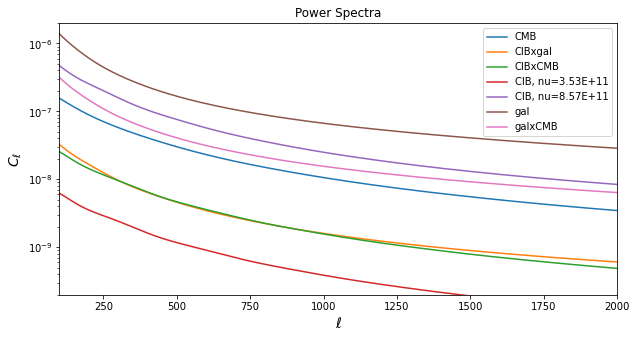

In [17]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
plt.figure()
Cl_kk = power.get_kappa_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_gg = power.get_gal_ps(ells)
plt.semilogy(ells, Cl_kk, label="CMB")
nu = 353e9
Cl_Ig = power.get_cib_gal_ps(ells, nu)
plt.semilogy(ells, Cl_Ig, label=f"CIBxgal")
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
plt.semilogy(ells, Cl_Ik, label=f"CIBxCMB")
Cl_II = power.get_cib_ps(ells, nu)
plt.semilogy(ells, Cl_II, label=f"CIB, nu={nu:.2E}")
nu = 857e9
Cl_II = power.get_cib_ps(ells, nu)
plt.semilogy(ells, Cl_II, label=f"CIB, nu={nu:.2E}")
plt.semilogy(ells, Cl_gg, label=f"gal")
plt.semilogy(ells, Cl_gk, label="galxCMB")
plt.xlim(100,2000)
plt.ylim(2e-10, 2e-6)
plt.ylabel("$C_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Power Spectra")
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))


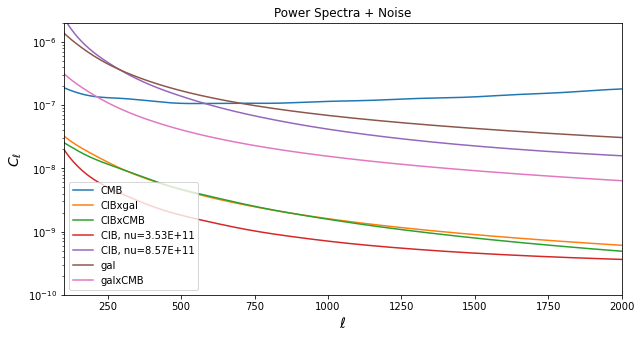

In [18]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
plt.figure()
Cl_kk = power.get_kappa_ps(ells)
_noise=Noise()
N0_file = "cache/_N0/SO_base/gmv/N0_TEB_lensed_T30-3000_P30-5000.npy"
_noise.setup_cmb_noise(N0_file, cmb_offset=2)
N_kk = _noise.get_N0("phi", ellmax=ellmax, tidy=True, ell_factors=False)[ells]
Cl_gg = power.get_gal_ps(ells)
N_gg = _noise.get_gal_shot_N(ellmax=ellmax)[ells]
plt.semilogy(ells, Cl_kk+N_kk, label="CMB")
nu = 353e9
N_II = _noise.get_cib_shot_N(nu, ellmax=ellmax)[ells]
N_dust = _noise.get_dust_N(nu, ellmax=ellmax)[ells]
Cl_Ig = power.get_cib_gal_ps(ells, nu)
plt.semilogy(ells, Cl_Ig, label=f"CIBxgal")
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
plt.semilogy(ells, Cl_Ik, label=f"CIBxCMB")
Cl_II = power.get_cib_ps(ells, nu)
plt.semilogy(ells, Cl_II+N_II+N_dust, label=f"CIB, nu={nu:.2E}")
nu = 857e9
N_II = _noise.get_cib_shot_N(nu, ellmax=ellmax)[ells]
N_dust = _noise.get_dust_N(nu, ellmax=ellmax)[ells]
Cl_II = power.get_cib_ps(ells, nu)
plt.semilogy(ells, Cl_II+N_II+N_dust, label=f"CIB, nu={nu:.2E}")
plt.semilogy(ells, Cl_gg+N_gg, label=f"gal")
plt.semilogy(ells, Cl_gk, label="galxCMB")
plt.xlim(100,2000)
plt.ylim(1e-10, 2e-6)
plt.ylabel("$C_{\ell}$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.title("Power Spectra + Noise")
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))


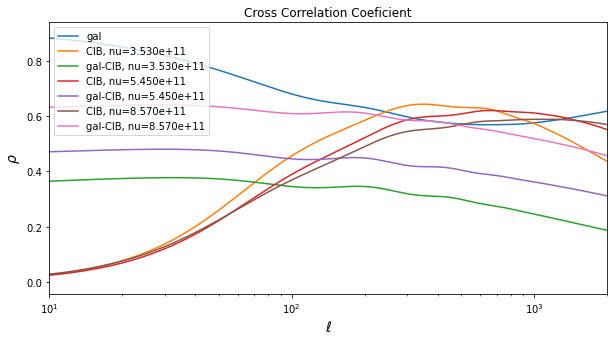

In [19]:
N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, corr_gg, label="gal")
nus = [353e9, 545e9, 857e9]
for nu in nus:
    N_cib = _noise.get_cib_shot_N(nu=nu)
    N_dust = _noise.get_dust_N(nu)
    Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
    Cl_II = power.get_cib_ps(ells, nu)
    corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
    plt.semilogx(ells, corr_II, label=f"CIB, nu={nu:.3e}")
    Cl_gI = power.get_cib_gal_ps(ells, nu=nu)
    corr_gI = Cl_gI/(np.sqrt((Cl_gg + N_g[ells])*(Cl_II + N_cib[ells])))
    plt.semilogx(ells, corr_gI, label=f"gal-CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(10,2000)
plt.legend()
plt.title("Cross Correlation Coeficient")
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)


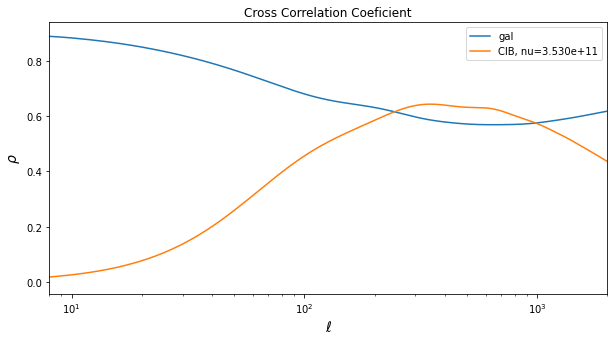

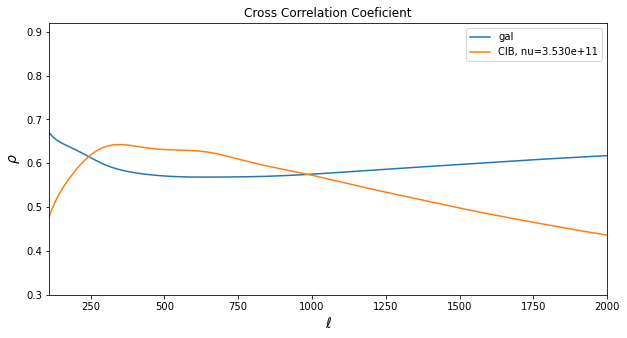

In [20]:
N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))

plt.figure()
plt.semilogx(ells, corr_gg, label="gal")
nu=353e9
N_cib = _noise.get_cib_shot_N(nu=nu)
N_dust = _noise.get_dust_N(nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
Cl_II = power.get_cib_ps(ells, nu)
corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
plt.semilogx(ells, corr_II, label=f"CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(8,2000)
plt.legend()
plt.title("Cross Correlation Coeficient")

plt.figure()
plt.plot(ells, corr_gg, label="gal")
plt.plot(ells, corr_II, label=f"CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(110,2000)
plt.ylim(0.3,0.92)
plt.legend()
plt.title("Cross Correlation Coeficient")
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))
/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:151: RuntimeWarning: divide by zero encountered in true_divide
  D_l = self._microK2_to_MJy2(A, nu) * ((100 / ells) ** alpha / ((1 + (ells / l_c) ** 2) ** (gamma / 2)))


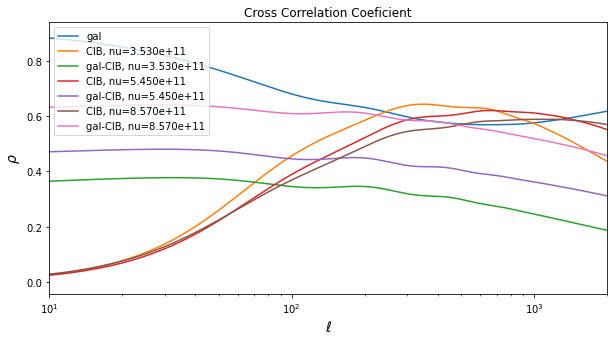

In [21]:
N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))
plt.semilogx(ells, corr_gg, label="gal")
nus = [353e9, 545e9, 857e9]
for nu in nus:
    N_cib = _noise.get_cib_shot_N(nu=nu)
    N_dust = _noise.get_dust_N(nu)
    Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
    Cl_II = power.get_cib_ps(ells, nu)
    corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
    plt.semilogx(ells, corr_II, label=f"CIB, nu={nu:.3e}")
    Cl_gI = power.get_cib_gal_ps(ells, nu=nu)
    corr_gI = Cl_gI/(np.sqrt((Cl_gg + N_g[ells])*(Cl_II + N_cib[ells])))
    plt.semilogx(ells, corr_gI, label=f"gal-CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(10,2000)
plt.legend()
plt.title("Cross Correlation Coeficient")
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/noise.py:130: RuntimeWarning: divide by zero encountered in power
  return A * ells**(-alpha)


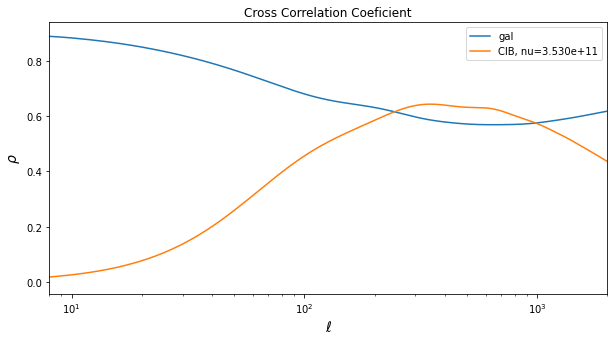

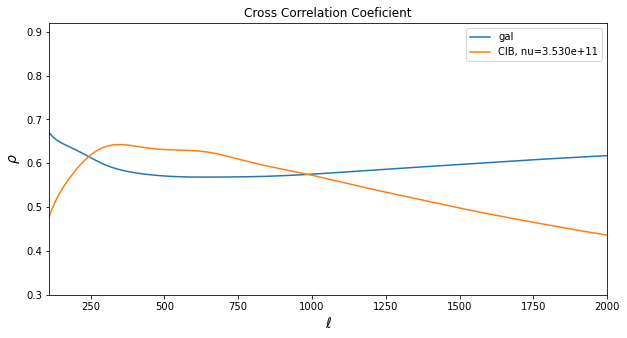

In [22]:
N_g = _noise.get_gal_shot_N()
Cl_gg = power.get_gal_ps(ells)
Cl_gI = power.get_cib_gal_ps(ells)
Cl_gk = power.get_gal_kappa_ps(ells)
Cl_kk = power.get_kappa_ps(ells)
corr_gg = Cl_gk/(np.sqrt((Cl_gg + N_g[ells])*Cl_kk))

plt.figure()
plt.semilogx(ells, corr_gg, label="gal")
nu=353e9
N_cib = _noise.get_cib_shot_N(nu=nu)
N_dust = _noise.get_dust_N(nu)
Cl_Ik = power.get_cib_kappa_ps(ells, nu, Chi_str)
Cl_II = power.get_cib_ps(ells, nu)
corr_II = Cl_Ik/(np.sqrt((Cl_II+N_cib[ells]+N_dust[ells])*Cl_kk))
plt.semilogx(ells, corr_II, label=f"CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(8,2000)
plt.legend()
plt.title("Cross Correlation Coeficient")

plt.figure()
plt.plot(ells, corr_gg, label="gal")
plt.plot(ells, corr_II, label=f"CIB, nu={nu:.3e}")
plt.ylabel(r"$\rho$", fontsize=14)
plt.xlabel("$\ell$", fontsize=14)
plt.xlim(110,2000)
plt.ylim(0.3,0.92)
plt.legend()
plt.title("Cross Correlation Coeficient")
plt.show()

In [23]:
print(cosmo.z_to_Chi(4))
print(cosmo.get_hubble(0))

7340.962539571486
0.00022637934407271473


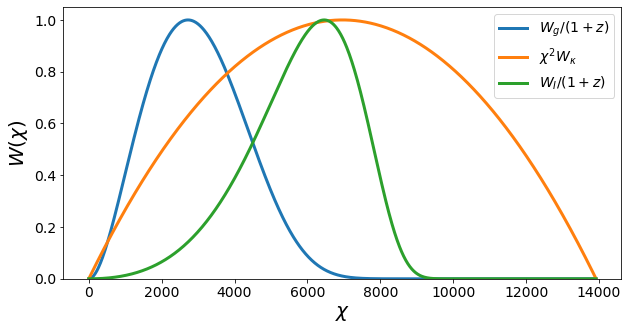

In [24]:
Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)
# print(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
# cmb_window_Chi = (1+(Chis))*cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)/(1+zs)
plt.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g/(1+z)$", linewidth=3)
plt.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$\chi^2W_{\kappa}$", linewidth=3)
plt.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}/(1+z)$", linewidth=3)
# ax[1].plot([cosmo.z_to_Chi(8),cosmo.z_to_Chi(8)],[0,2], color='k', linestyle="--", linewidth=3)
# ax[1].set_title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=20)
plt.xlabel("$\chi$", fontsize=20)
plt.ylim(0,1.05)
plt.legend(prop={'size': 14})
plt.tick_params(labelsize=14)
plt.show()

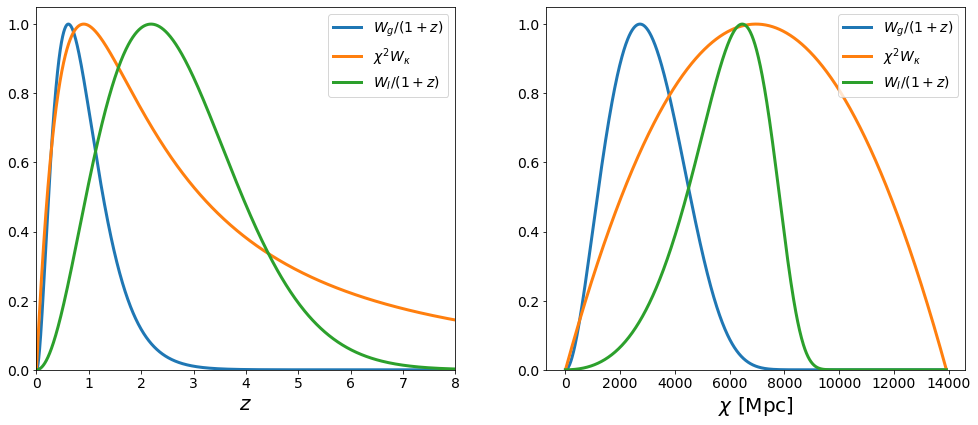

In [25]:
plt.rcParams['figure.figsize'] = [15, 7]
plt.rc('figure', facecolor='w')
cosmo = Cosmology()
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_window_z(zs)/(1+zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = cmb_window_Chi/cosmo.get_hubble(zs)
nu = 353e9
cib_window_z = cosmo.cib_window_z(zs, nu)/(1+zs)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
fig, ax = plt.subplots(1,2)
fig.tight_layout(pad=6)
ax[0].plot(zs, gal_window_z/np.max(gal_window_z), label="$W_g/(1+z)$", linewidth=3)
ax[0].plot(zs, Chis**2*cmb_window_z/np.max(Chis**2*cmb_window_z), label="$\chi^2W_{\kappa}$", linewidth=3)
ax[0].plot(zs, cib_window_z/((np.max(cib_window_z))), label="$W_{I}/(1+z)$", linewidth=3)
# ax[0].set_title("Normalised Window Functions")
# ax[0].set_ylabel("$W(z)$", fontsize=20)
ax[0].set_xlabel("$z$", fontsize=20)
ax[0].set_xlim(0,8)
ax[0].set_ylim(0,1.05)
ax[0].legend(prop={'size': 14})
ax[0].tick_params(labelsize=14)


Chis = np.linspace(1, Chi_str, 1000)
zs = cosmo.Chi_to_z(Chis)
# print(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)/(1+zs)
# cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_Chi = cosmo.cmb_lens_window(Chis, Chi_str)
# cmb_window_Chi = (1+(Chis))*cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)/(1+zs)
ax[1].plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g/(1+z)$", linewidth=3)
ax[1].plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$\chi^2W_{\kappa}$", linewidth=3)
ax[1].plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}/(1+z)$", linewidth=3)
# ax[1].plot([cosmo.z_to_Chi(8),cosmo.z_to_Chi(8)],[0,2], color='k', linestyle="--", linewidth=3)
# ax[1].set_title("Normalised Window Functions")
# ax[1].set_ylabel("$W(\chi)$", fontsize=20)
ax[1].set_xlabel("$\chi$ [Mpc]", fontsize=20)
ax[1].set_ylim(0,1.05)
ax[1].legend(prop={'size': 14})
ax[1].tick_params(labelsize=14)
plt.show()

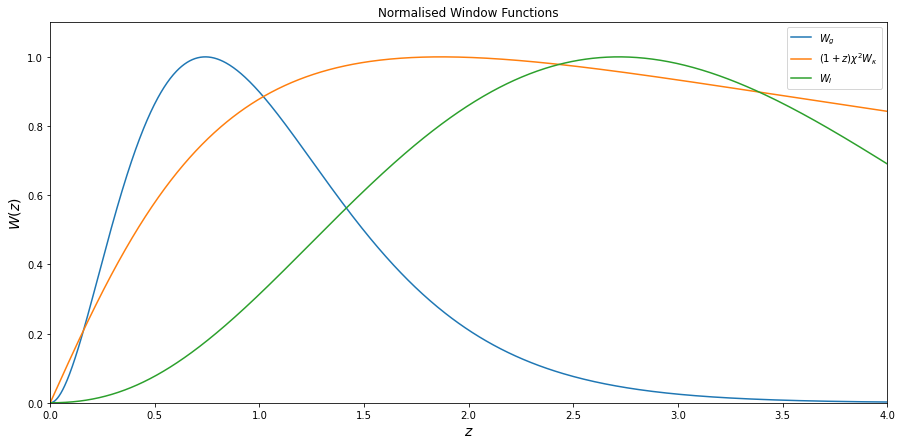

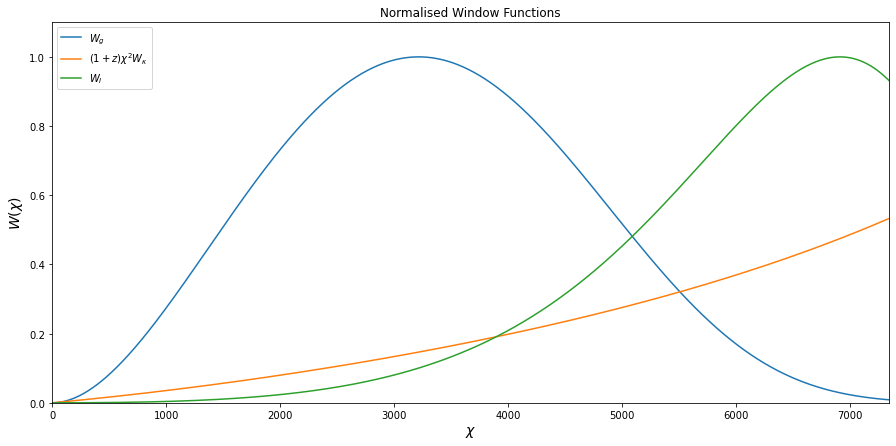

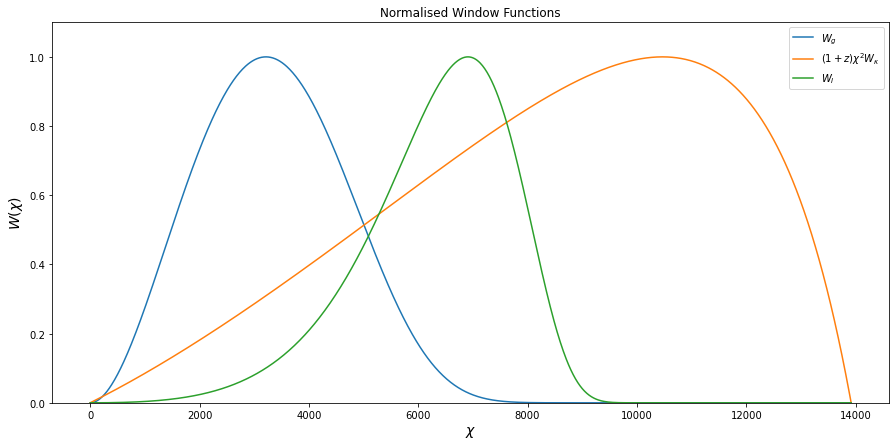

In [26]:
Chi_str = cosmo.get_chi_star()
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
gal_window_z = cosmo.gal_window_z(zs)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
cmb_window_Chi = (1+zs)*cosmo.cmb_lens_window(Chis, Chi_str)
cmb_window_z = cmb_window_Chi/cosmo.get_hubble(zs)
nu = 353e9
cib_window_z = cosmo.cib_window_z(zs, nu)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
plt.figure()
plt.plot(zs, gal_window_z/np.max(gal_window_z), label="$W_g$")
plt.plot(zs, Chis**2*cmb_window_z/np.max(Chis**2*cmb_window_z), label="$(1+z)\chi^2W_{\kappa}$")
plt.plot(zs, cib_window_z/((np.max(cib_window_z))), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.xlim(0,4)
plt.ylim(0,1.1)
plt.legend()
plt.figure()
plt.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g$")
plt.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$(1+z)\chi^2W_{\kappa}$")
plt.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=14)
plt.xlabel("$\chi$", fontsize=14)
plt.ylim(0,1.1)
plt.xlim(0,7340)
plt.legend()
plt.figure()
Chis = np.linspace(1, Chi_str, 1000)
gal_window_Chi = cosmo.gal_window_Chi(Chis)
cmb_window_Chi = (1+zs)*cosmo.cmb_lens_window(Chis, Chi_str)
cib_window_Chi = cosmo.cib_window_Chi(Chis, nu)
plt.plot(Chis, gal_window_Chi/np.max(gal_window_Chi), label="$W_g$")
plt.plot(Chis, Chis**2*cmb_window_Chi/np.max(Chis**2*cmb_window_Chi), label="$(1+z)\chi^2W_{\kappa}$")
plt.plot(Chis, cib_window_Chi/np.max(cib_window_Chi), label="$W_{I}$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(\chi)$", fontsize=14)
plt.xlabel("$\chi$", fontsize=14)
plt.ylim(0,1.1)
plt.legend()
plt.show()

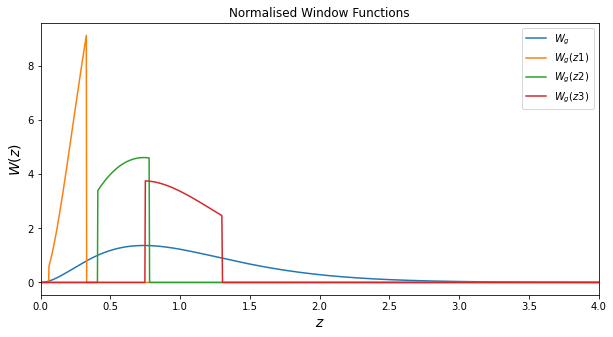

In [26]:
gal_window_z = cosmo.gal_window_z(zs)
gal_window_z1 = cosmo.gal_window_z(zs, zmin=0.06, zmax=0.33)
gal_window_z2 = cosmo.gal_window_z(zs, zmin=0.41, zmax=0.78)
gal_window_z3 = cosmo.gal_window_z(zs, zmin=0.75, zmax=1.3)

plt.plot(zs, gal_window_z, label="$W_g$")
plt.plot(zs, gal_window_z1, label="$W_g(z1)$")
plt.plot(zs, gal_window_z2, label="$W_g(z2)$")
plt.plot(zs, gal_window_z3, label="$W_g(z3)$")
plt.title("Normalised Window Functions")
plt.ylabel("$W(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.xlim(0,4)
#plt.ylim(0,1.5)
plt.legend()
plt.show()

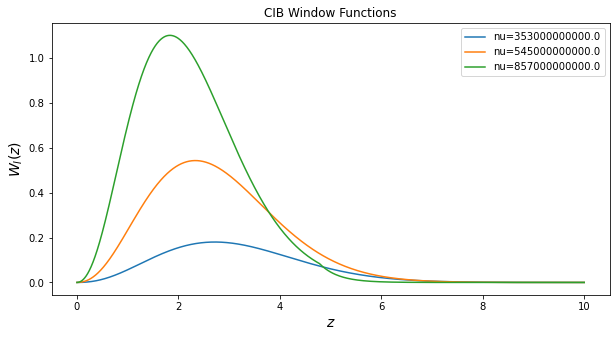

In [19]:
ellmax = 4000
ells = np.arange(2, ellmax + 1, 1)
Chis = np.linspace(1, cosmo.z_to_Chi(10), 1000)
zs = cosmo.Chi_to_z(Chis)
cib_window_z = cosmo.cib_window_z(zs)
cib_window_Chi = cosmo.cib_window_Chi(Chis)
nus = [353e9, 545e9, 857e9]
for nu in nus:
    cib_window_z = cosmo.cib_window_z(zs, nu=nu)
    plt.plot(zs, cib_window_z, label=f"nu={nu}")
plt.title("CIB Window Functions")
plt.ylabel("$W_{I}(z)$", fontsize=14)
plt.xlabel("$z$", fontsize=14)
plt.legend()
plt.show()

In [20]:
mode = Modecoupling()
ells1 = np.arange(1, 1000, 1)
ells2 = ells1
M_kk = mode.components(ells1, ells2, Nchi=100)

In [22]:
M_gg = mode.components(ells1, ells2, typ="gal-gal", Nchi=100)

In [24]:
M_gk = mode.components(ells1, ells2, typ="gal-kappa", Nchi=100)

In [26]:
M_kg = mode.components(ells1, ells2, typ="kappa-gal", Nchi=100)

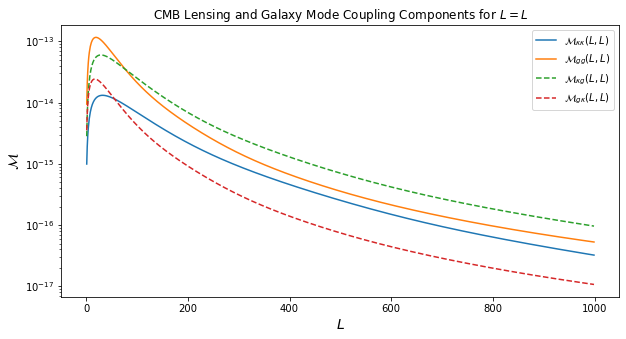

In [28]:
plt.figure()
M_kk = mode.components(ells1, ells2, typ="kappa-kappa", Nchi=100)
plt.semilogy(ells1, M_kk, label="$\mathcal{M}_{\kappa \kappa}(L,L)$")
plt.semilogy(ells1, M_gg, label="$\mathcal{M}_{gg}(L,L)$")
plt.semilogy(ells1, np.abs(M_kg), linestyle="--", label="$\mathcal{M}_{\kappa g}(L,L)$")
plt.semilogy(ells1, np.abs(M_gk), linestyle="--", label="$\mathcal{M}_{g \kappa}(L,L)$")
plt.title("CMB Lensing and Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}$", fontsize=14)
plt.legend()
plt.show()

In [29]:
M_II = mode.components(ells1, ells2, typ="cib-cib", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:123: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


In [31]:
M_Ik = mode.components(ells1, ells2, typ="cib-kappa", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:123: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


In [33]:
M_kI = mode.components(ells1, ells2, typ="kappa-cib", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:123: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


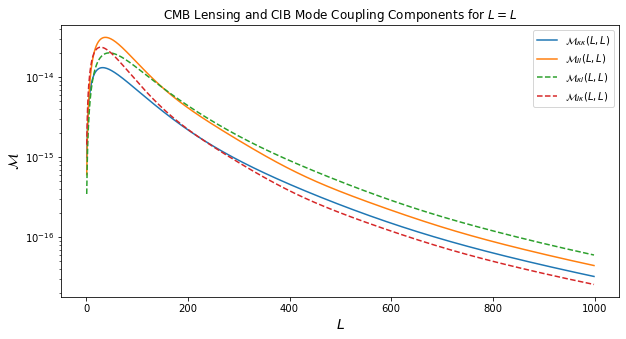

In [35]:
plt.figure()
plt.semilogy(ells1, M_kk, label="$\mathcal{M}_{\kappa \kappa}(L,L)$")
plt.semilogy(ells1, M_II, label="$\mathcal{M}_{II}(L,L)$")
plt.semilogy(ells1, np.abs(M_kI), linestyle="--", label="$\mathcal{M}_{\kappa I}(L,L)$")
plt.semilogy(ells1, np.abs(M_Ik), linestyle="--", label="$\mathcal{M}_{I\kappa}(L,L)$")
plt.title("CMB Lensing and CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}$", fontsize=14)
plt.legend()
plt.show()

In [36]:
M_gI = mode.components(ells1, ells2, typ="gal-cib", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:123: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


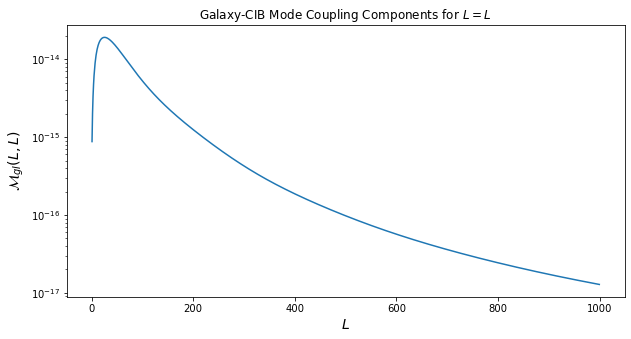

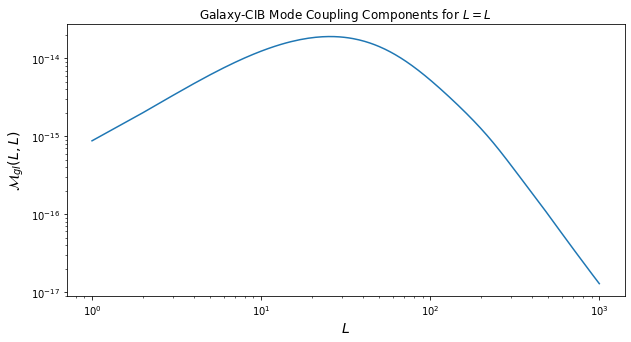

In [37]:
plt.figure()
plt.semilogy(ells1, M_gI)
plt.title("Galaxy-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g I}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_gI)
plt.title("Galaxy-CIB Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{g I}(L,L)$", fontsize=14)

plt.show()

In [38]:
M_Ig = mode.components(ells1, ells2, typ="cib-gal", Nchi=100)

/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:122: RuntimeWarning: divide by zero encountered in reciprocal
  small_nu = (np.exp(exponent) - 1) ** -1 * nu ** pow
/Users/mr671/Documents/repos/omegaQE/kkomega/cosmology.py:123: RuntimeWarning: divide by zero encountered in reciprocal
  big_nu = (np.exp(exponent) - 1)**-1 * nu_prim**pow * (nu/nu_prim)**-alpha


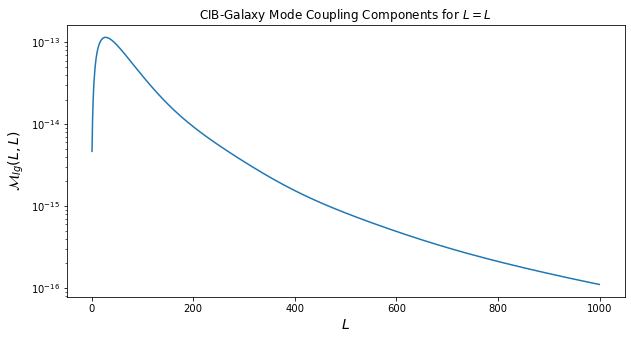

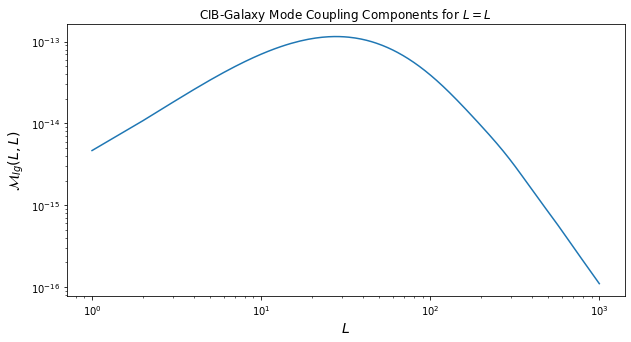

In [39]:
plt.figure()
plt.semilogy(ells1, M_Ig)
plt.title("CIB-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{I g}(L,L)$", fontsize=14)

plt.figure()
plt.loglog(ells1, M_Ig)
plt.title("CIB-Galaxy Mode Coupling Components for $L=L$")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$\mathcal{M}_{I g}(L,L)$", fontsize=14)

plt.show()

In [40]:
from bispectra import Bispectra
bi = Bispectra()

In [64]:
ells1 = np.arange(2, 10001)
ells2 = ells1/2
ells3 = 1000
bi_ggw = bi.get_bispectrum("ggw", ells1, ells2, ells3, M_spline=True)

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


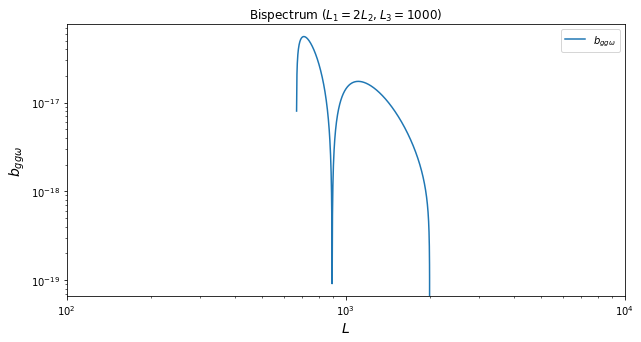

In [65]:
plt.figure()
plt.loglog(ells1, np.abs(bi_ggw), label="$b_{gg\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gg\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


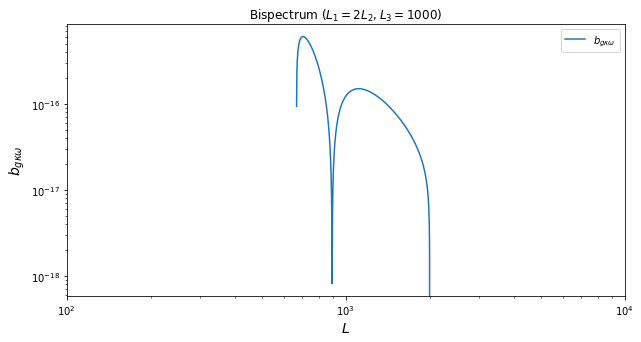

In [66]:
bi_gkw = bi.get_bispectrum("gkw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{g\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


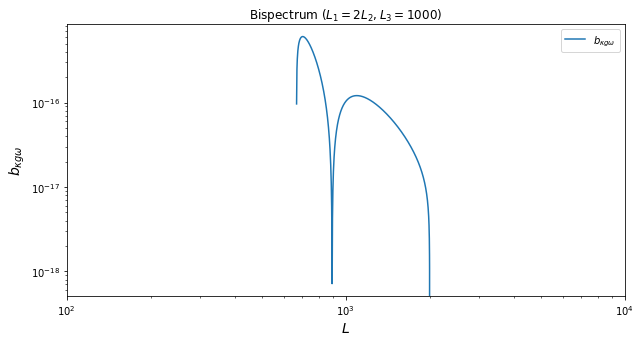

In [67]:
bi_kgw = bi.get_bispectrum("kgw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_kgw), label="$b_{\kappa g\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa g\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


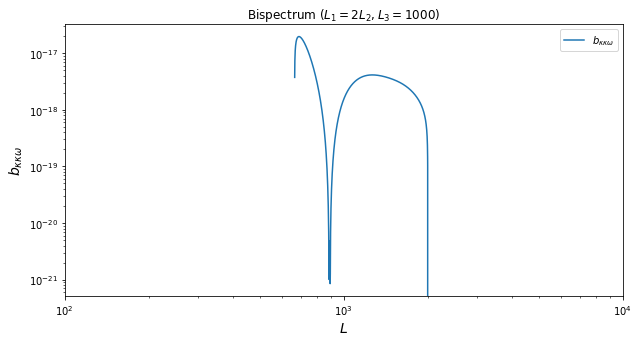

In [68]:
bi_kkw = bi.get_bispectrum("kkw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, np.abs(bi_kkw), label="$b_{\kappa\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


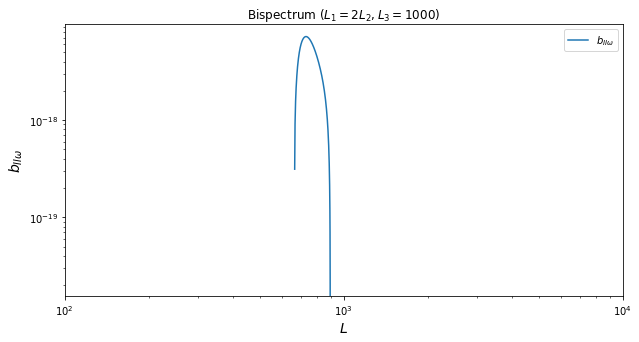

In [69]:
bi_IIw = bi.get_bispectrum("IIw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_IIw, label="$b_{II\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{II\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


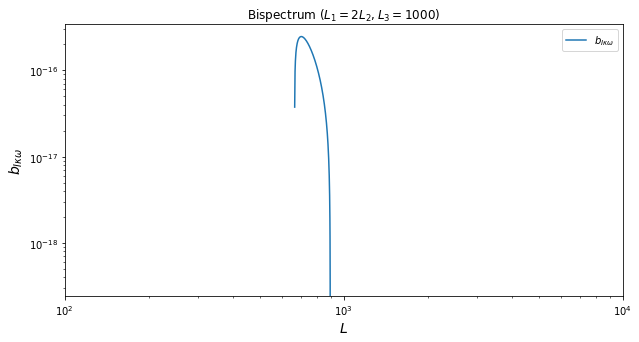

In [70]:
bi_Ikw = bi.get_bispectrum("Ikw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_Ikw, label="$b_{I\kappa\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{I\kappa\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


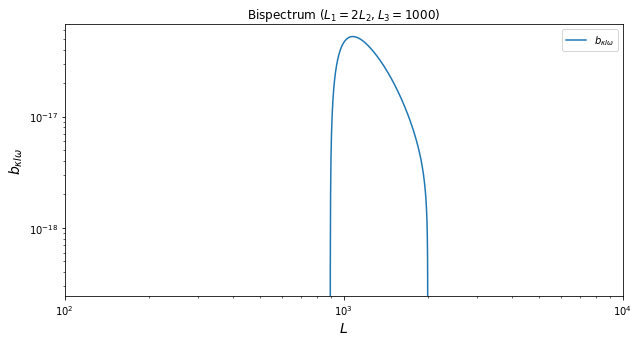

In [71]:
bi_kIw = bi.get_bispectrum("kIw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_kIw, label="$b_{\kappa I\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{\kappa I\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


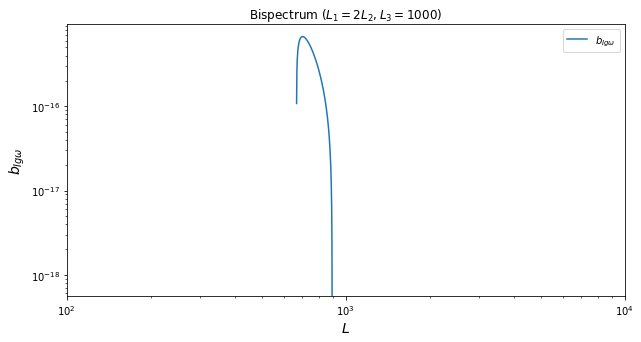

In [72]:
bi_Igw = bi.get_bispectrum("Igw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_Igw, label="$b_{Ig\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{Ig\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

/Users/mr671/Documents/repos/omegaQE/kkomega/bispectra.py:42: RuntimeWarning: invalid value encountered in sqrt
  return 2 * np.sqrt(s*(s-mag1)*(s-mag2)*(s-mag3))


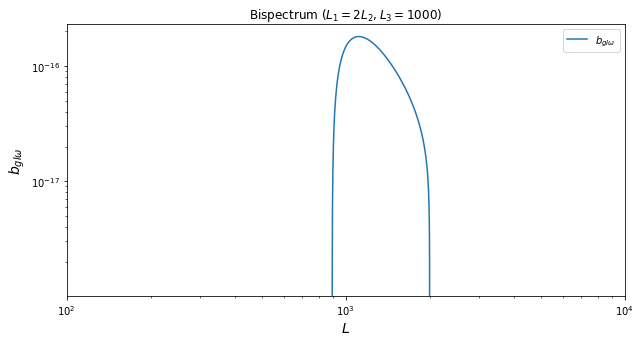

In [73]:
bi_gIw = bi.get_bispectrum("gIw", ells1, ells2, ells3, M_spline=True)
plt.figure()
plt.loglog(ells1, bi_gIw, label="$b_{gI\omega}$")
plt.title("Bispectrum ($L_1=2L_2, L_3=1000$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b_{gI\omega}$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [74]:
ells2 = ells1
ells3 = ells1
bi_kkk = bi.get_bispectrum("kkk", ells1, ells2, ells3, M_spline=True)
bi_gkw = bi.get_bispectrum("gkw", ells1, ells2, ells3, M_spline=True)
bi_Ikw = bi.get_bispectrum("Ikw", ells1, ells2, ells3, M_spline=True)
bi_Igw = bi.get_bispectrum("Igw", ells1, ells2, ells3, M_spline=True)

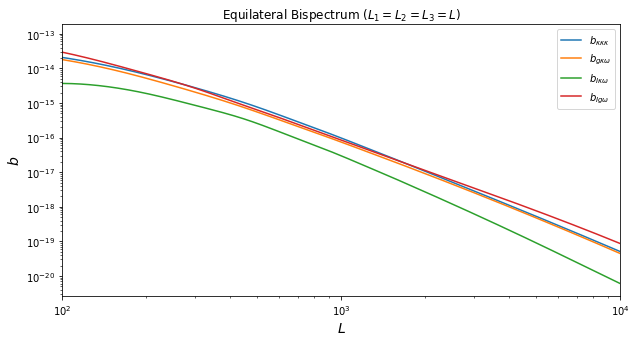

In [75]:
plt.figure()
plt.loglog(ells1, np.abs(bi_kkk), label="$b_{\kappa\kappa\kappa}$")
plt.loglog(ells1, np.abs(bi_gkw), label="$b_{g\kappa\omega}$")
plt.loglog(ells1, np.abs(bi_Ikw), label="$b_{I\kappa\omega}$")
plt.loglog(ells1, np.abs(bi_Igw), label="$b_{Ig\omega}$")
plt.title("Equilateral Bispectrum ($L_1=L_2=L_3=L$)")
plt.xlabel("$L$", fontsize=14)
plt.ylabel("$b$", fontsize=14)
plt.xlim(1e2, 1e4)
plt.legend()
plt.show()

In [76]:
def get_L3s(L1, L2, steps):
    Lmin = np.floor(np.abs(L1 - L2)) + 1
    Lmax = np.ceil(L1 + L2)
    L3s = np.arange(Lmin, Lmax, steps, dtype=int)
    Lmid = L1//2
    Lrange = Lmid - L3s[0]
    return L3s[np.where(L3s <= Lmid + Lrange)]

def get_bi_slice(L1, steps, typ):
    bi_slice = np.empty((L1 + 1, L1 + 1))
    bi_slice[:] = np.nan
    L2s = np.arange(L1//2, L1 + 1, steps, dtype=int)
    for L2 in L2s:
        L3s = get_L3s(L1, L2, steps)
        bi_slice[L2, L3s] = bi.get_bispectrum(typ, L1, L2, L3s, M_spline=True)
    return bi_slice

In [77]:
plt.rcParams['figure.figsize'] = [10,4]
def slice_plot(L1, steps, bispectrum = "kkw", interpolation="nearest"):
    bi_slice = get_bi_slice(L1, steps, typ=bispectrum)
    masked_slice = np.ma.array(bi_slice, mask=np.isnan(bi_slice))
    plt.figure()
    cmap = matplotlib.cm.jet
    cmap = matplotlib.cm.get_cmap("jet").copy()
    cmap.set_bad('white',1.)
    plt.imshow(masked_slice[L1//2:, :], interpolation=interpolation, cmap=cmap, origin='lower', extent=[0, L1, L1//2, L1])
    plt.colorbar()

    x = np.arange(0,L1 + 1, steps)
    y = np.concatenate((np.arange(L1, L1//2, -steps), np.arange(L1//2, L1 + 1, steps)))
    plt.plot(x,y, linewidth=5, color='k')
    plt.xlabel("$L_3$")
    plt.ylabel("$L_2$")
    if bispectrum == "rot":
        plt.title(f"$b^{{\kappa\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "conv":
        plt.title(f"$b^{{\kappa\kappa\kappa}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "ggw":
        plt.title(f"$b^{{gg\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "gkw":
        plt.title(f"$b^{{g\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "IIw":
        plt.title(f"$b^{{II\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "Ikw":
        plt.title(f"$b^{{I\kappa\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")
    elif bispectrum == "Igw":
        plt.title(f"$b^{{Ig\omega}}_{{L_1L_2L_3}}$ for L1 = {L1}")

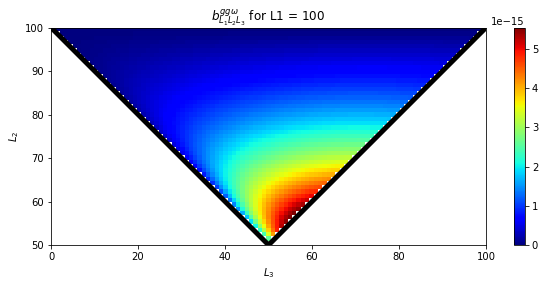

In [78]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

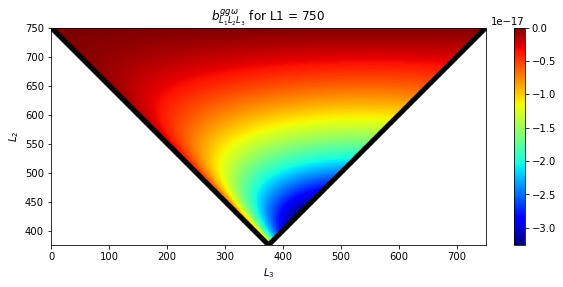

In [79]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

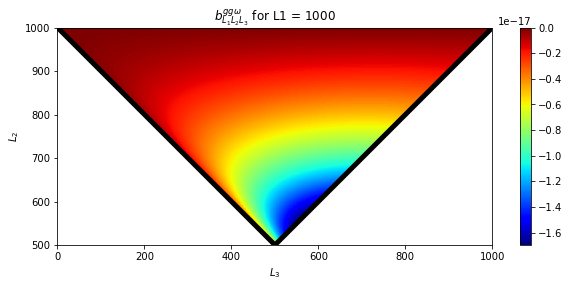

In [80]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="ggw")
plt.show()

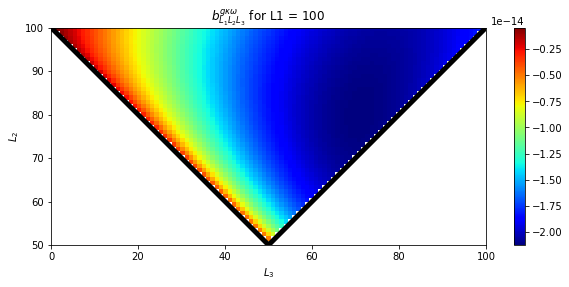

In [81]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

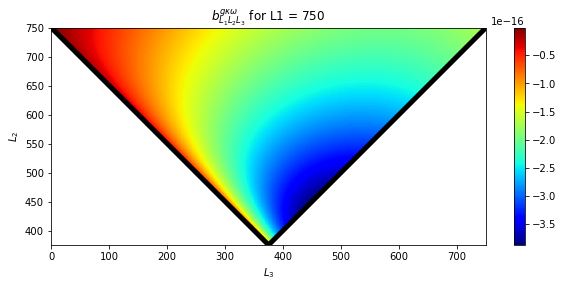

In [82]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

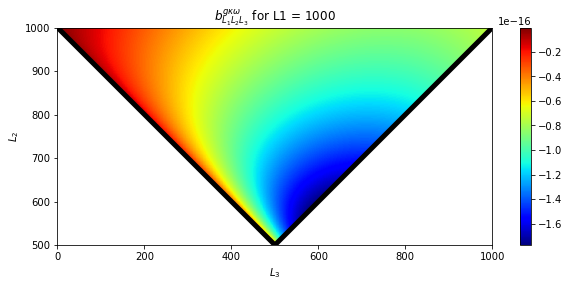

In [83]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="gkw")
plt.show()

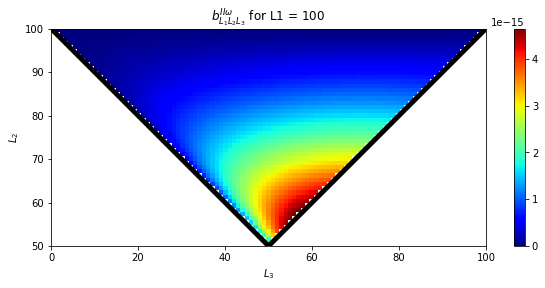

In [84]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

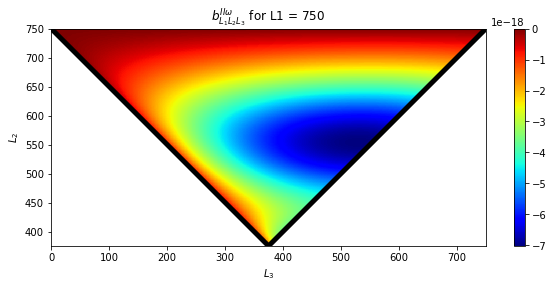

In [85]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

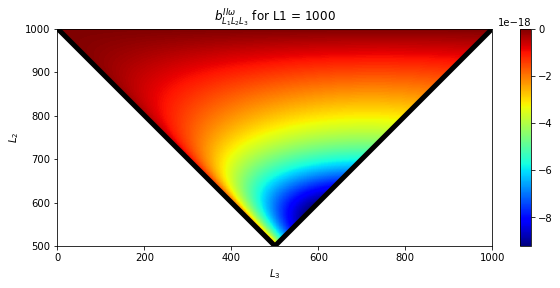

In [86]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="IIw")
plt.show()

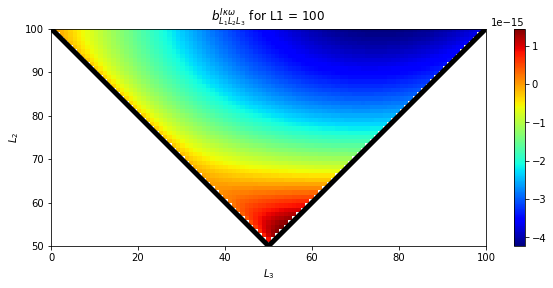

In [87]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()

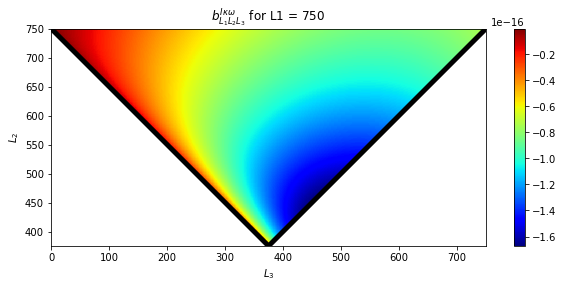

In [88]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()

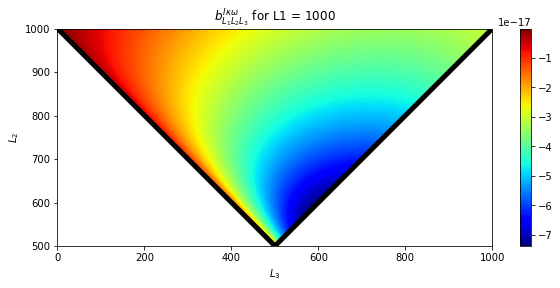

In [89]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="Ikw")
plt.show()

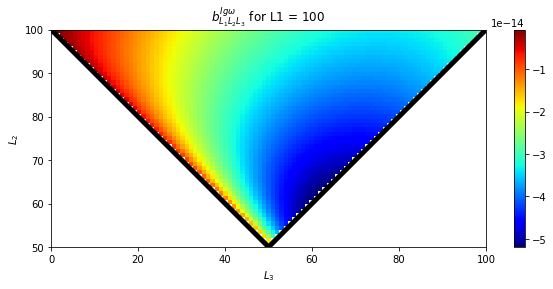

In [90]:
L1 = 100
slice_plot(L1, steps=1, bispectrum="Igw")
plt.show()

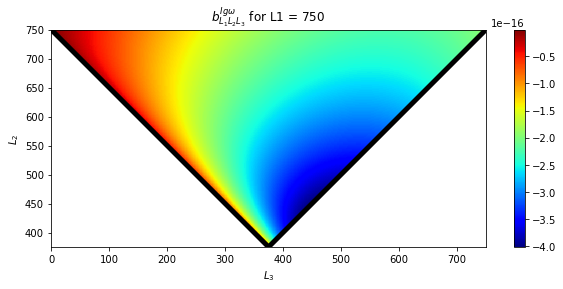

In [91]:
L1 = 750
slice_plot(L1, steps=1, bispectrum="Igw")
plt.show()

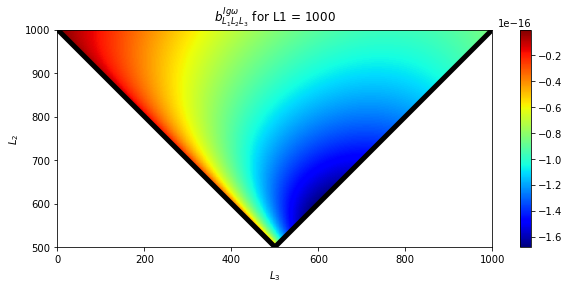

In [92]:
L1 = 1000
slice_plot(L1, steps=1, bispectrum="Igw")
plt.show()